In [1]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import scipy.io as sio
import pprint as pp
import numpy as np
import os
import re
import gc

In [2]:
mdir = '/sanssauvegarde/homes/v18porti/info/Brest_Samples/'
BIGDDir = '/media/v18porti/ADATA SH14/stg/Brest/'
mdir = BIGDDir

In [39]:
mat = sio.loadmat(mdir + 'RS10050/RS10050_170501_115334.mat')
mat

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Wed Jun 19 15:43:23 2019',
 '__version__': '1.0',
 'patient': array([[(array([[array([[(array([[5.78968819e-31],
        [1.54236689e-30],
        [1.82103315e-30],
        ...,
        [7.48354243e-12],
        [7.48354243e-12],
        [7.48354243e-12]]), array([[-1.],
        [-1.],
        [-1.],
        ...,
        [-1.],
        [-1.],
        [-1.]], dtype=float32), array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]], dtype=float32), array([[ 3.16809974e-06],
        [-5.09546044e-05],
        [-1.60360432e-04],
        ...,
        [ 1.83105469e-04],
        [ 1.83105469e-04],
        [ 1.83105469e-04]]), array([[1.000000e+00],
        [1.000000e+00],
        [1.000000e+00],
        ...,
        [8.107126e-03],
        [0.000000e+00],
        [6.462045e-06]], dtype=float32), array([[0.10754327],
        [0.00653844],
        [0.01404973],
        

In [40]:
patient_struct = mat['patient']
pp.pprint(patient_struct.shape)
pp.pprint(patient_struct.dtype)
patient_struct

(1, 1)
dtype([('voie', 'O')])


array([[(array([[array([[(array([[5.78968819e-31],
       [1.54236689e-30],
       [1.82103315e-30],
       ...,
       [7.48354243e-12],
       [7.48354243e-12],
       [7.48354243e-12]]), array([[-1.],
       [-1.],
       [-1.],
       ...,
       [-1.],
       [-1.],
       [-1.]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32), array([[ 3.16809974e-06],
       [-5.09546044e-05],
       [-1.60360432e-04],
       ...,
       [ 1.83105469e-04],
       [ 1.83105469e-04],
       [ 1.83105469e-04]]), array([[1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       ...,
       [8.107126e-03],
       [0.000000e+00],
       [6.462045e-06]], dtype=float32), array([[0.10754327],
       [0.00653844],
       [0.01404973],
       ...,
       [0.02980308],
       [1.        ],
       [0.03352251]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=f

In [41]:
voie = patient_struct[0, 0]['voie']
pp.pprint(voie.shape)
pp.pprint(voie.dtype)
voie

(1, 3)
dtype('O')


array([[array([[(array([[5.78968819e-31],
       [1.54236689e-30],
       [1.82103315e-30],
       ...,
       [7.48354243e-12],
       [7.48354243e-12],
       [7.48354243e-12]]), array([[-1.],
       [-1.],
       [-1.],
       ...,
       [-1.],
       [-1.],
       [-1.]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32), array([[ 3.16809974e-06],
       [-5.09546044e-05],
       [-1.60360432e-04],
       ...,
       [ 1.83105469e-04],
       [ 1.83105469e-04],
       [ 1.83105469e-04]]), array([[1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       ...,
       [8.107126e-03],
       [0.000000e+00],
       [6.462045e-06]], dtype=float32), array([[0.10754327],
       [0.00653844],
       [0.01404973],
       ...,
       [0.02980308],
       [1.        ],
       [0.03352251]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32), 

In [42]:
# voie will have a shape of (1, n), where n # of info inside
n = (voie.shape)[1]
print(n)
# ...
voie_1 = voie[0,0] # [0, n]
pp.pprint(voie_1.shape)
pp.pprint(voie_1.dtype)
voie_1

3
(1, 1)
dtype([('vectorFiltSignal', 'O'), ('vectorComeBackTime', 'O'), ('vectorInitState', 'O'), ('vectorDetSignal', 'O'), ('mpCorrRes', 'O'), ('mpAmpFRes', 'O'), ('mpAmpUFRes', 'O'), ('mpCorrRes_brut', 'O'), ('mpCount', 'O'), ('mpTimeRRRes', 'O'), ('mpAlphaOKRes', 'O'), ('mpBetaOKRes', 'O'), ('mpMuOKRes', 'O'), ('mpAlphaNOKRes', 'O'), ('mpBetaNOKRes', 'O'), ('mpMuNOKRes', 'O'), ('mpAlphaOKGammaRes', 'O'), ('mpBetaOKGammaRes', 'O'), ('mpAlphaNOKGammaRes', 'O'), ('mpBetaNOKGammaRes', 'O'), ('mpAlphaOKGammaRRRes', 'O'), ('mpBetaOKGammaRRRes', 'O'), ('mpAlphaNOKGammaRRRes', 'O'), ('mpBetaNOKGammaRRRes', 'O'), ('mpAlphaOKBetaRes', 'O'), ('mpBetaOKBetaRes', 'O'), ('mpAlphaNOKBetaRes', 'O'), ('mpBetaNOKBetaRes', 'O'), ('vectorMobility', 'O'), ('vectorOKAnnotRes', 'O'), ('vectorCorrKLD', 'O'), ('vectorUFAmpKLD', 'O'), ('vectorFAmpKLD', 'O'), ('vectorRRKLD', 'O')])


array([[(array([[5.78968819e-31],
       [1.54236689e-30],
       [1.82103315e-30],
       ...,
       [7.48354243e-12],
       [7.48354243e-12],
       [7.48354243e-12]]), array([[-1.],
       [-1.],
       [-1.],
       ...,
       [-1.],
       [-1.],
       [-1.]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32), array([[ 3.16809974e-06],
       [-5.09546044e-05],
       [-1.60360432e-04],
       ...,
       [ 1.83105469e-04],
       [ 1.83105469e-04],
       [ 1.83105469e-04]]), array([[1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       ...,
       [8.107126e-03],
       [0.000000e+00],
       [6.462045e-06]], dtype=float32), array([[0.10754327],
       [0.00653844],
       [0.01404973],
       ...,
       [0.02980308],
       [1.        ],
       [0.03352251]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32), array([[

In [43]:
data = voie_1[0, 0]
label = (voie_1.dtype).names

In [44]:
voie[0,0]

array([[(array([[5.78968819e-31],
       [1.54236689e-30],
       [1.82103315e-30],
       ...,
       [7.48354243e-12],
       [7.48354243e-12],
       [7.48354243e-12]]), array([[-1.],
       [-1.],
       [-1.],
       ...,
       [-1.],
       [-1.],
       [-1.]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32), array([[ 3.16809974e-06],
       [-5.09546044e-05],
       [-1.60360432e-04],
       ...,
       [ 1.83105469e-04],
       [ 1.83105469e-04],
       [ 1.83105469e-04]]), array([[1.000000e+00],
       [1.000000e+00],
       [1.000000e+00],
       ...,
       [8.107126e-03],
       [0.000000e+00],
       [6.462045e-06]], dtype=float32), array([[0.10754327],
       [0.00653844],
       [0.01404973],
       ...,
       [0.02980308],
       [1.        ],
       [0.03352251]], dtype=float32), array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32), array([[

In [45]:
voie_1.shape


(1, 1)

In [46]:
voie_1[label[0]]

array([[array([[5.78968819e-31],
       [1.54236689e-30],
       [1.82103315e-30],
       ...,
       [7.48354243e-12],
       [7.48354243e-12],
       [7.48354243e-12]])]], dtype=object)

In [47]:
def getPatientStruct(mat_file):
    return mat_file['patient']

def getVoie(patient):
    return patient[0, 0]['voie']

# voie will have a shape of (1, n), where n # of info inside range(0,n-1)
def getVoieInfo(voie, n):
    voie_n = voie[0,n]
    return voie_n[0, 0]

def getLabels(voie, n):
    voie_n = voie[0,n]
    return (voie_n.dtype).names

def createDir(d):
    if not os.path.exists(d):
        os.makedirs(d)

In [48]:
def isStartStringMatched(s, m):
    return re.match(m + '.+', s)

def studyData(mat_dir):
    for dir_path in os.listdir(mat_dir):
        if isStartStringMatched(dir_path, 'RS'):
            for file_path in os.listdir(mat_dir + dir_path):
                 if file_path.endswith(".mat"):
                    print(file_path)
                    # do analysis
    
studyData(mdir)

RS10000_170623_103140.mat
RS10001_170503_100212.mat
RS10002_170119_175122.mat
RS10003_170119_135122.mat
RS10004_170214_100711.mat
RS10005_170117_151052.mat
RS10006_170509_121747.mat
RS10006_170512_105550.mat
RS10007_170425_101941.mat
RS10007_170426_155734.mat
RS10008_170516_101313.mat
RS10008_170516_141313.mat
RS10008_170516_171902.mat
RS10009_170113_142348.mat
RS10010_170607_102733.mat
RS10012_170427_104649.mat
RS10013_160824_132124.mat
RS10014_170413_105203.mat
RS10015_170221_155052.mat
RS10016_170421_145606.mat
RS10017_170216_110856.mat
RS10018_160823_120107.mat
RS10019_170412_144455.mat
RS10020_170403_142907.mat
RS10021_170413_145203.mat
RS10022_170330_114711.mat
RS10023_170201_114738.mat
RS10024_170323_110214.mat
RS10025_160817_095915.mat
RS10026_160818_094756.mat
RS10027_160816_100332.mat
RS10029_170228_143356.mat
RS10032_170403_111011.mat
RS10033_170112_113016.mat
RS10034_170116_100355.mat
RS10035_161230_092057.mat
RS10036_170220_144205.mat
RS10037_170123_151734.mat
RS10038_1703

In [49]:
ps = getPatientStruct(mat)
vo = getVoie(ps)
n = (vo.shape)[1]
print(n)
labels = getLabels(vo, 0)

3


In [50]:
labels

('vectorFiltSignal',
 'vectorComeBackTime',
 'vectorInitState',
 'vectorDetSignal',
 'mpCorrRes',
 'mpAmpFRes',
 'mpAmpUFRes',
 'mpCorrRes_brut',
 'mpCount',
 'mpTimeRRRes',
 'mpAlphaOKRes',
 'mpBetaOKRes',
 'mpMuOKRes',
 'mpAlphaNOKRes',
 'mpBetaNOKRes',
 'mpMuNOKRes',
 'mpAlphaOKGammaRes',
 'mpBetaOKGammaRes',
 'mpAlphaNOKGammaRes',
 'mpBetaNOKGammaRes',
 'mpAlphaOKGammaRRRes',
 'mpBetaOKGammaRRRes',
 'mpAlphaNOKGammaRRRes',
 'mpBetaNOKGammaRRRes',
 'mpAlphaOKBetaRes',
 'mpBetaOKBetaRes',
 'mpAlphaNOKBetaRes',
 'mpBetaNOKBetaRes',
 'vectorMobility',
 'vectorOKAnnotRes',
 'vectorCorrKLD',
 'vectorUFAmpKLD',
 'vectorFAmpKLD',
 'vectorRRKLD')

In [51]:
a = []
a[0]

IndexError: list index out of range

In [52]:
v = np.asarray([[]])
v

array([], shape=(1, 0), dtype=float64)

In [53]:
len(v)

1

[[-1.]
 [-1.]
 [-1.]
 ...
 [-1.]
 [-1.]
 [-1.]]


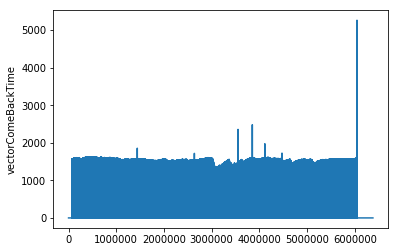

"mat = sio.loadmat(mdir + 'RS10001/RS10001_170503_100212.mat')\nps = getPatientStruct(mat)\nvo = getVoie(ps)\nn = (vo.shape)[1]\nprint(n)\ninfo = getVoieInfo(vo, 0)\nplt.plot(info[labels[1]])\nplt.ylabel(labels[1])\nplt.show()"

In [55]:
"""info = getVoieInfo(vo, 0)
plt.plot(info[labels[1]])
plt.ylabel(labels[1])
plt.show()"""
info = getVoieInfo(vo, 0)
print(info[labels[1]])
plt.plot(info[labels[1]])
plt.ylabel(labels[1])
plt.xticks(fontsize=10)
plt.show()
"""mat = sio.loadmat(mdir + 'RS10001/RS10001_170503_100212.mat')
ps = getPatientStruct(mat)
vo = getVoie(ps)
n = (vo.shape)[1]
print(n)
info = getVoieInfo(vo, 0)
plt.plot(info[labels[1]])
plt.ylabel(labels[1])
plt.show()"""

0


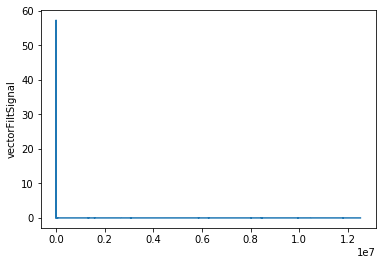

1


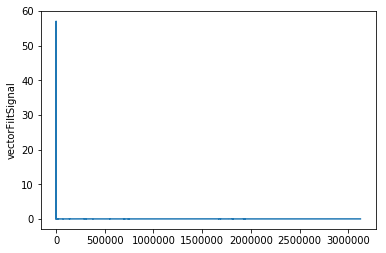

0


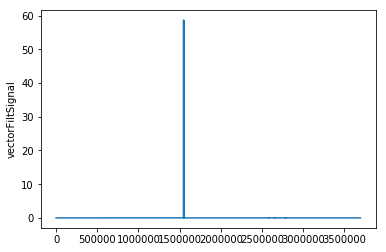

1


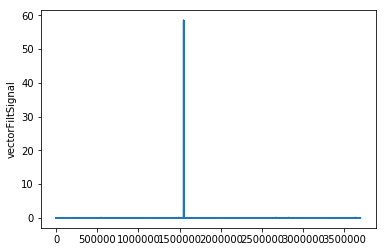

2


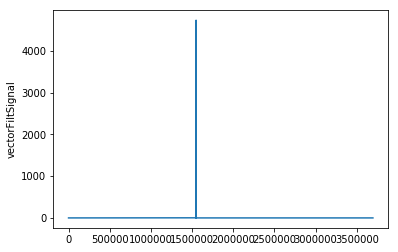

0


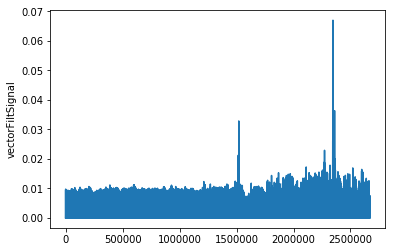

1


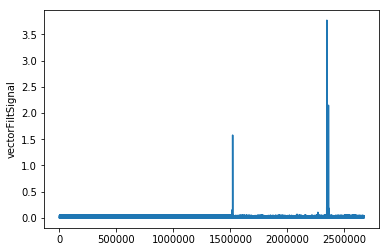

2


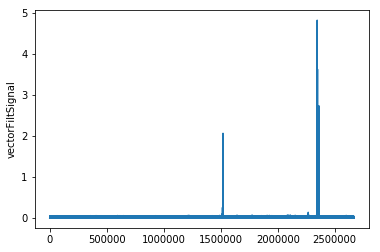

In [14]:
def studyLabelInFiles(mat_dir, labels, label, total, starting):
    cnt = 0
    fcnt = 0
    for dir_path in os.listdir(mat_dir):
        if isStartStringMatched(dir_path, 'RS'):
            for file_path in os.listdir(mat_dir + dir_path):
                if file_path.endswith(".mat"):
                    mat = sio.loadmat(mdir + dir_path + '/' + file_path)
                    ps = getPatientStruct(mat)
                    vo = getVoie(ps)
                    n = (vo.shape)[1]
                    for i in range(n):
                        if fcnt < starting: fcnt += 1; continue
                        if cnt >= total: return 
                        else: cnt += 1
                        info = getVoieInfo(vo, i)
                        print(i)
                        plt.plot(info[label])
                        plt.ylabel(label)
                        plt.show()
                        
                    
studyLabelInFiles(mdir, labels, 'vectorFiltSignal', 8, 0)

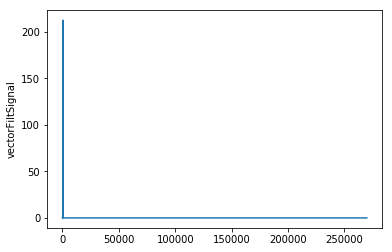

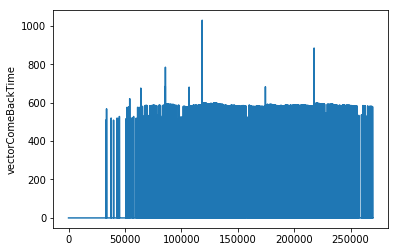

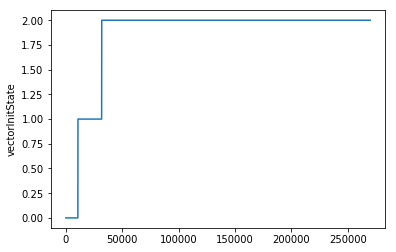

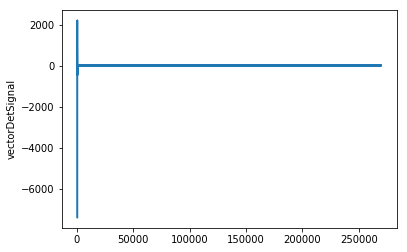

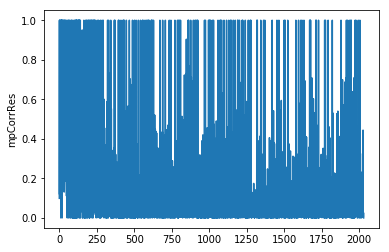

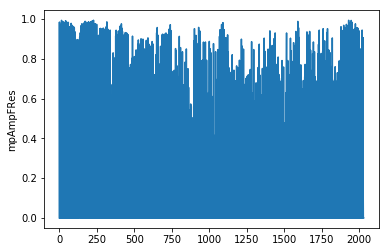

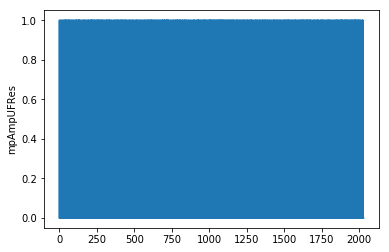

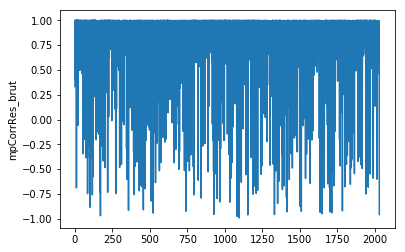

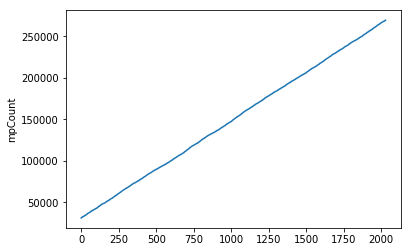

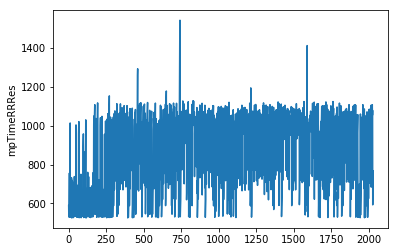

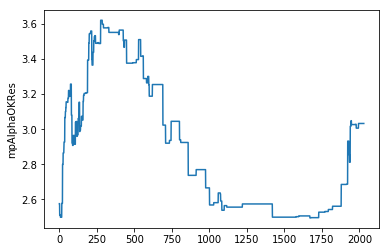

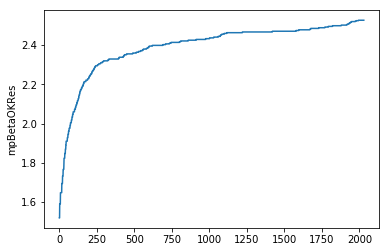

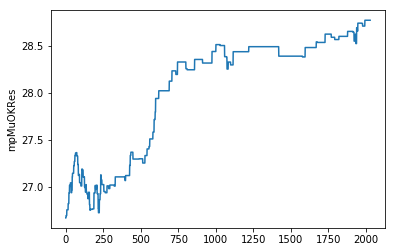

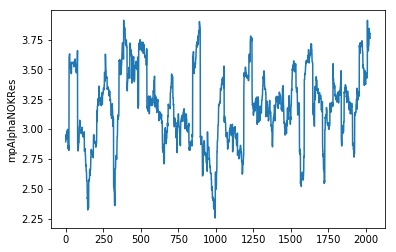

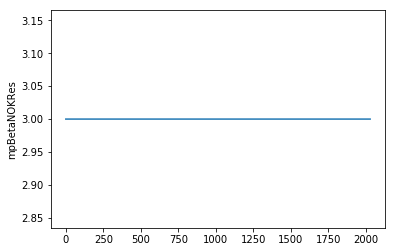

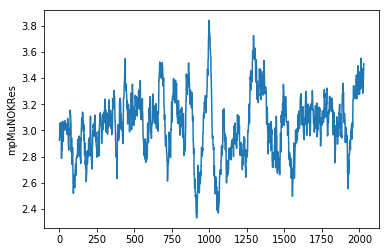

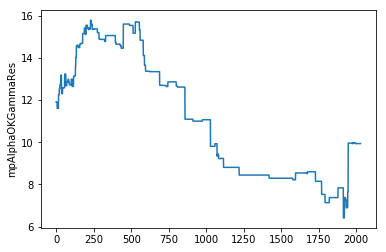

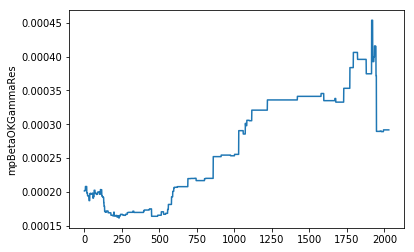

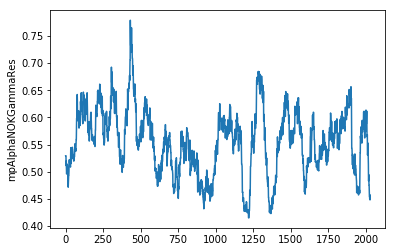

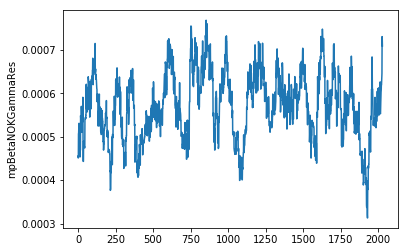

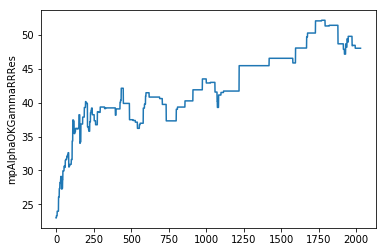

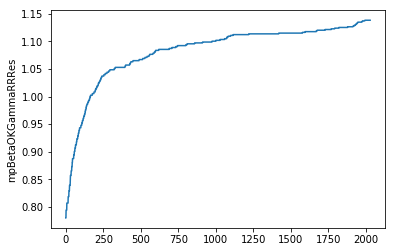

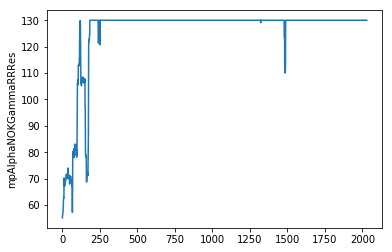

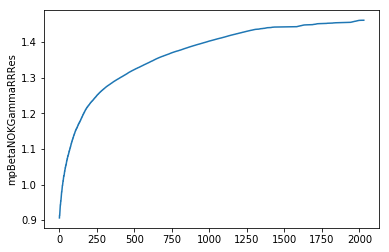

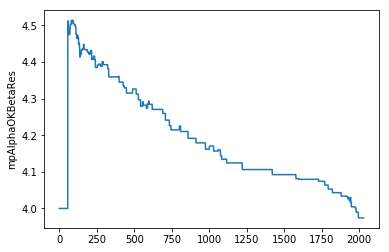

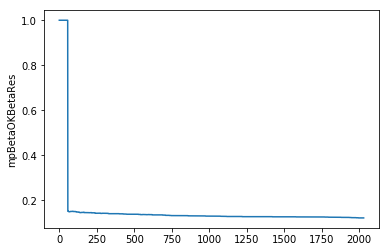

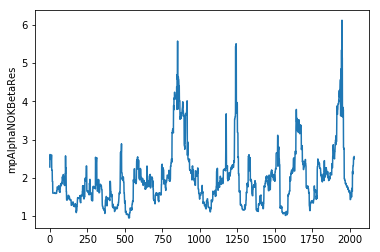

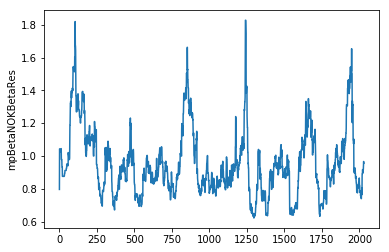

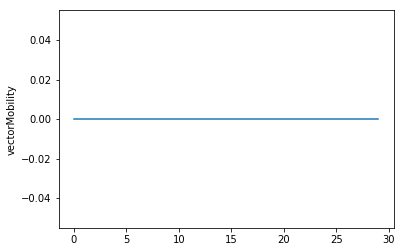

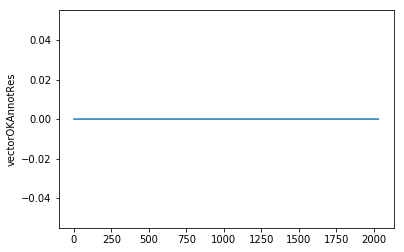

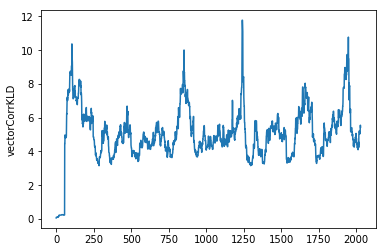

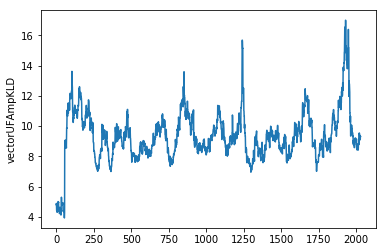

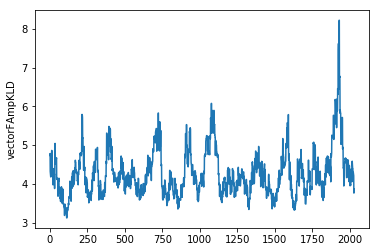

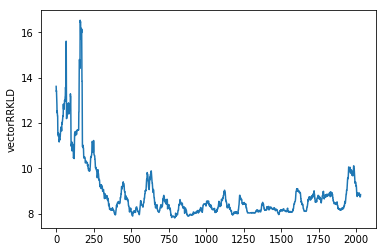

In [15]:
def showDiffLabels(labels, voie, n):
    for label in labels:
        info = getVoieInfo(voie, n)
        plt.figure()
        plt.plot(info[label])
        plt.ylabel(label)
        plt.show()        
        
showDiffLabels(labels, vo, 0)

FileNotFoundError: [Errno 2] No such file or directory: './output/one-pat/vectorFiltSignal.eps'

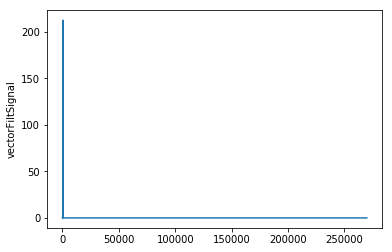

In [16]:
def printDiffLabels(labels, voie, n):
    for label in labels:
        info = getVoieInfo(voie, n)
        plt.figure()
        plt.plot(info[label])
        plt.ylabel(label)
        plt.savefig('./output/one-pat/' + label + '.eps')
        plt.clf()
        plt.close()
        
printDiffLabels(labels, vo, 0)

In [ ]:
info = getVoieInfo(vo, 0)
plt.plot(info['mpAmpUFRes'])
plt.ylabel('mpAmpUFRes')
plt.show()

RS10000 - 0
RS10000 - 1


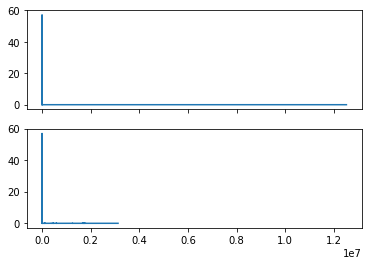

In [11]:
def printOneVariableForAllPatients(mat_dir, labels, label, start, total):
    cnt = 0
    fcnt = 0
    for dir_path in os.listdir(mat_dir):
        if isStartStringMatched(dir_path, 'RS'):
            for file_path in os.listdir(mat_dir + dir_path):
                 if file_path.endswith(".mat"):
                    mat = sio.loadmat(mdir + dir_path + '/' + file_path)
                    ps = getPatientStruct(mat)
                    vo = getVoie(ps)
                    n = (vo.shape)[1]
                    if fcnt < start: fcnt += n; continue
                    fig, axs = plt.subplots(n, sharex=True) #, sharey=True)
                    for i in range(n):
                        #if fcnt < start: fcnt += 1; continue
                        if cnt >= total: continue 
                        else: cnt += 1
                        print(dir_path + ' - ' + str(i))
                        info = getVoieInfo(vo, i)
                        # print
                        axs[i].plot(info[label])
                        """plt.subplot(n, 1, i+1)
                        plt.plot(info[label])
                        plt.xticks(fontsize=7)"""
                    plt.savefig('./output/' + label + file_path.split('.')[0] + '.jpg')
                    plt.savefig('./output/' + label + file_path.split('.')[0] + '.tif')
                    plt.savefig('./output/' + label + file_path.split('.')[0] + '.png')
                    plt.savefig('./output/' + label + file_path.split('.')[0] + '.rgba')
                    if cnt >= total: return 
                        
printOneVariableForAllPatients(mdir, labels, 'vectorFiltSignal', 0, 2)